> ## 1. Histogramas

> Usando la función `randn`, generen $N$ valores tipo `Float64` al azar ($N\sim 10000$, o mayor, es razonable). Construyan la función `histograma`, que regresa un vector de tamaño $n_{hist}$ (que es un argumento de la función) y que contiene el histograma de frecuencias *sin normalizar*. Esto es, la primer componente del vector corresponde al número de valores generados al azar que caen en el intervalo (llamado *bin* en inglés) $[x_0, x_1)$, los de la segunda componente caen en el intervalo $[x_1, x_2)$, etc, hasta $[x_{n_{hist}-1}, x{n_{hist}})$, donde el tamaño de los intervalos es el mismo y corresponde a $\Delta x = (\textrm{sup}(x)-\textrm{inf}(x))/n_{hist}$. (No escatimen en estética.)
> 
> Dibujen el histograma a partir de sus datos.
> 
> PyPlot (matplotlib) de hecho tiene [una función]() útil para dibujar histogramas a partir de los datos directamente. Utilizando esa función, muestren el histograma de sus datos. Debería ser muy parecida a la que ya obtuvieron antes.

> NOTA: Hay esencialmente dos formas de hacerlo, que se distinguen por el número de veces que uno lee los datos. Traten de hacer su implementación usando *una* lectura de los datos. (Si no pueden, llevarán sobre sus hombros esa carga toda su vida.)

Definimos la función histograma que ya hace magia de implementar un sólo ciclo.
Calcula el parámetro:
$$ \delta = d_k - b_{min}$$
Si $h$ es el tamaño del bin definido como: 
$$ h = \frac{b_{max} - b_{min}}{N_{bins}} $$
Y $d_k \in H$, siendo $H$ el conjunto de datos a utilizar.
Tendremos entonces, dividiendo por $h$ en la primera expresión:
$$ \frac{\delta}{h} = N_{bins} \left( \frac{d_k - b_{min}}{b_{max} - b_{min}}    \right) $$
Donde hemos asumido que hemos hecho $N_{bins}$ subintervalos regulares $\{ N_j \}$.

Como $\frac{\delta}{h}$ nos dice _cuántos_ subintervalos de longitud $h$ caben en la distancia $\delta$:
$$ \frac{\delta}{h} \approx j$$
Tomando el ___entero mayor más próximo___ (yo hice esto solo por comodidad, por cómo comienza a contar mi función el índice de los histogramas, tomando el límite superior como referencia.) Tendremos: 

$$ j = \lfloor \frac{\delta}{h}     \rfloor $$
$$ j = \lfloor N_{bins} \left( \frac{d_k - b_{min}}{b_{max} - b_{min}}    \right)     \rfloor $$

In [21]:
using PyPlot

In [42]:
"""
```
histograma(data::Array{T<:Real, 1}, N::Int64, graficar::Bool)
``` \n

Calcula el tamaño del bin tomando en cuenta el valor minimo y maximo del arreglo y devuelve un arreglo de `Int64`
con la misma longitud de `N`.

- `data`: Datos de entrada en forma de un arreglo.
- `N`: Numero deseado de bins.
- `graficar`: la posición en True hace que histograma haga la grafica.
"""
function histograma{T<:Real}(data::Array{T, 1}, N::Int64, graficar::Bool=false)
    b_max =maximum(data)
    b_min = minimum(data)
    b_size = (b_max - b_min)/N
    
    Interval = linspace(b_min, b_max, N+1)      # generado para poder graficar.
    c = zeros(Int64, N+1)                       # El arreglo guarda N+1 elementos previniendo que necesitamos 
                                                # un indice extra para generar N subintervalos.
      
    for dat in data                             # el primer elemento es un problema, no se por que.
        δ= (N*(dat - b_min)/(b_max - b_min))    #Sumo este uno por comodidad, los indices comienzan todos en uno.
        index = convert(Int64, floor(δ))+1
        #println(dat, " ",δ, " ", index)
        c[index] += 1
        
        
    end
    
    graficar && bar(Interval, c, b_size, color="hotpink")
    

    return c[1:N-1]                             # yo ingore el ultimo bin para devolver algo de longitud b.
end

histograma (generic function with 2 methods)

Comprobamos que nuestra documentacion funcnione:

In [43]:
? histograma

search: 

```
histograma(data::Array{T<:Real, 1}, N::Int64, graficar::Bool)
```

Calcula el tamaño del bin tomando en cuenta el valor minimo y maximo del arreglo y devuelve un arreglo de `Int64` con la misma longitud de `N`.

  * `data`: Datos de entrada en forma de un arreglo.
  * `N`: Numero deseado de bins.
  * `graficar`: la posición en True hace que histograma haga la grafica.


histograma



Definimos nuestro conjunto de valores aleatorios y nuestro numero de bins... yo voy a poner 100, nada más.

In [44]:
R = rand(100000)   #Este tiene 100 000
N = 100

100

Finalmente probamos...

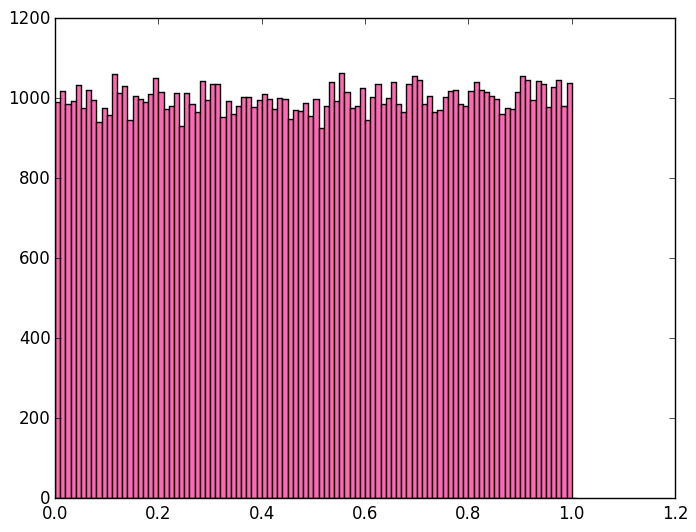

99-element Array{Int64,1}:
  991
 1019
  985
  994
 1034
  977
 1021
  995
  940
  976
  959
 1060
 1013
    ⋮
  977
  974
 1016
 1056
 1045
  996
 1043
 1036
  979
 1029
 1045
  982

In [45]:
H = histograma(R,N, true)

Lo intentamos ahora con la funcion de pyplot, que está bien rara.

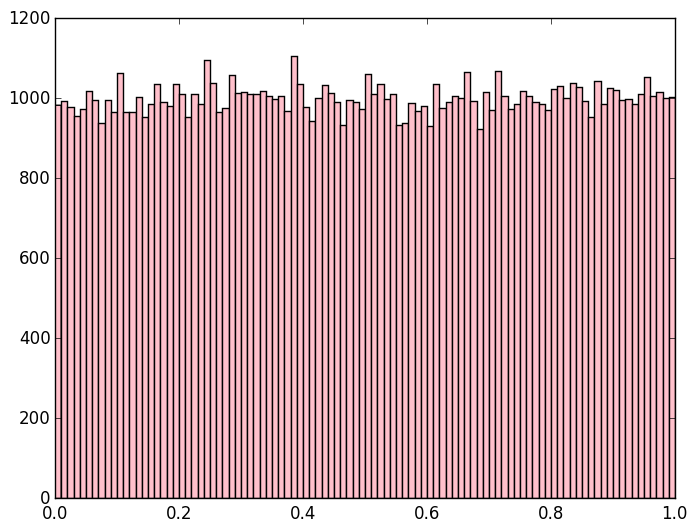

([983.0,993.0,979.0,957.0,973.0,1018.0,995.0,939.0,996.0,965.0  …  1022.0,996.0,999.0,987.0,1010.0,1054.0,1007.0,1017.0,1001.0,1003.0],[3.2542e-6,0.0100032,0.0200031,0.0300031,0.040003,0.050003,0.0600029,0.0700029,0.0800028,0.0900028  …  0.909998,0.919998,0.929998,0.939998,0.949998,0.959998,0.969998,0.979998,0.989998,0.999998],Any[PyObject <matplotlib.patches.Rectangle object at 0x31ad995d0>,PyObject <matplotlib.patches.Rectangle object at 0x31ad99e10>,PyObject <matplotlib.patches.Rectangle object at 0x31ada0790>,PyObject <matplotlib.patches.Rectangle object at 0x31ada5150>,PyObject <matplotlib.patches.Rectangle object at 0x31ada5b10>,PyObject <matplotlib.patches.Rectangle object at 0x31adaa490>,PyObject <matplotlib.patches.Rectangle object at 0x31adaae50>,PyObject <matplotlib.patches.Rectangle object at 0x31adaf7d0>,PyObject <matplotlib.patches.Rectangle object at 0x31adb4190>,PyObject <matplotlib.patches.Rectangle object at 0x31adb4b50>  …  PyObject <matplotlib.patches.Rectangle obje

In [32]:
p = plt[:hist](R, N, color="pink") #No se que es toda esa basura en la salida.

Por curiosidad podemos ejecutar el macro `@time`para ver que onda con ambas funciones:




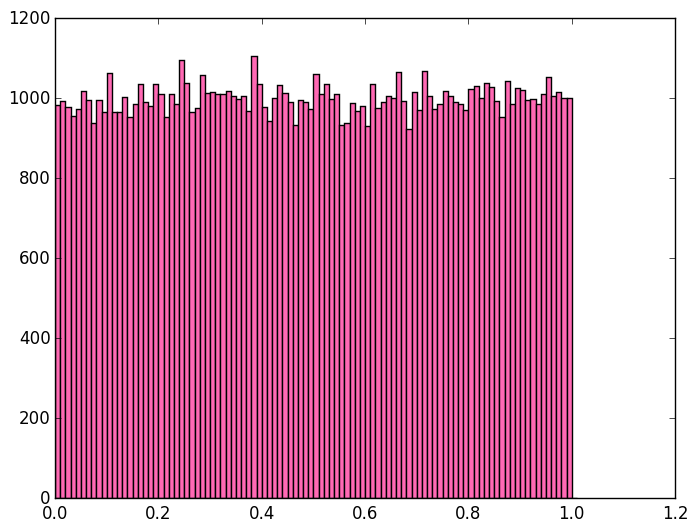

99-element Array{Int64,1}:
  983
  993
  979
  957
  973
 1018
  995
  939
  996
  965
 1063
  966
  967
    ⋮
 1044
  985
 1026
 1022
  996
  999
  987
 1010
 1054
 1007
 1017
 1001

0.136718 seconds (1.33 k allocations: 37.266 KB)


In [41]:
@time histograma(R,N, true)

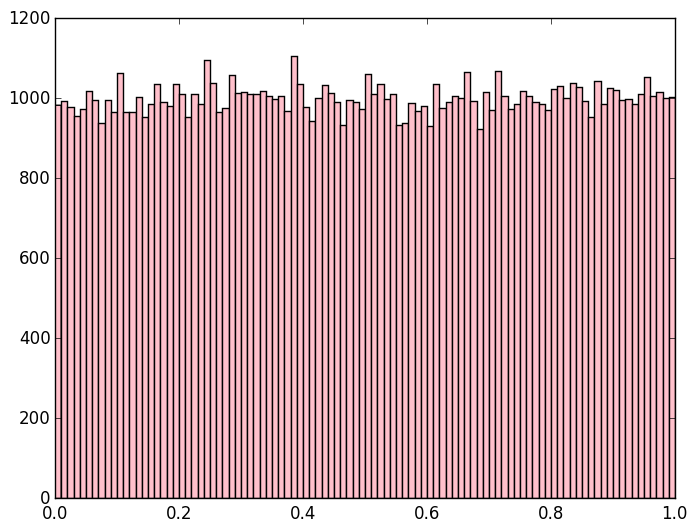

([983.0,993.0,979.0,957.0,973.0,1018.0,995.0,939.0,996.0,965.0  …  1022.0,996.0,999.0,987.0,1010.0,1054.0,1007.0,1017.0,1001.0,1003.0],[3.2542e-6,0.0100032,0.0200031,0.0300031,0.040003,0.050003,0.0600029,0.0700029,0.0800028,0.0900028  …  0.909998,0.919998,0.929998,0.939998,0.949998,0.959998,0.969998,0.979998,0.989998,0.999998],Any[PyObject <matplotlib.patches.Rectangle object at 0x31b427e10>,PyObject <matplotlib.patches.Rectangle object at 0x31b42f690>,PyObject <matplotlib.patches.Rectangle object at 0x31b42fad0>,PyObject <matplotlib.patches.Rectangle object at 0x31b4339d0>,PyObject <matplotlib.patches.Rectangle object at 0x31b439350>,PyObject <matplotlib.patches.Rectangle object at 0x31b439d10>,PyObject <matplotlib.patches.Rectangle object at 0x31b43f690>,PyObject <matplotlib.patches.Rectangle object at 0x31b43ff10>,PyObject <matplotlib.patches.Rectangle object at 0x31b445a10>,PyObject <matplotlib.patches.Rectangle object at 0x31b44a390>  …  PyObject <matplotlib.patches.Rectangle obje

0.132239 seconds (816 allocations: 20.922 KB)


In [39]:
@time plt[:hist](R, N, color="pink")


Y bueno, para nuestra función da `0.136718 seconds (1.33 k allocations: 37.266 KB)` y para la de pyplot `0.132239 seconds (816 allocations: 20.922 KB)`. Vemos que ahí se andan dando.

>## 2. Promedio y varianza

>(a) Siguiendo con la generación de datos del ejercicio anterior, hagan una subrutina que calcule el promedio y la varianza de los datos generados anteriormente. Comparen su resultado con lo que se obtiene al utilizar `mean` y `var` (que son las funciones nativas de julia que hacen eso).
    
>(b) Existe un [algoritmo recursivo](https://en.wikipedia.org/wiki/Algorithms_for_calculating_variance#Online_algorithm), ampliamente desconocido, que permite calcular el promedio y la varianza con una sóla lectura de los datos. Impleméntenlo. La *misma* función debería de darles *ambos* valores.
    
>(c) ¿Cuál de todos los algoritmos es el más rápido? Consideren esto para datos de distinta longitud, cubriendo varios órdenes de magnitud.

### (A) 
construimos las dos funciones que necesitamos.

In [51]:
function promedio(data)
    n = length(data)
    p = 0.0
    
    for dat in data
        p += dat
    end
    return p/n
end

function varianza_a(data)
    n = length(data)
    s = 0.0
    P = promedio(data)
    
    for dat in data
        s += (dat - P)^2
    end
    return (s /(n-1))
end
    

varianza_a (generic function with 1 method)

Las probamos:

In [49]:
Prueba = rand(10)

10-element Array{Float64,1}:
 0.579244 
 0.307847 
 0.583242 
 0.622852 
 0.619379 
 0.306397 
 0.017404 
 0.0576257
 0.0195486
 0.884606 

In [53]:
prom = promedio(Prueba)

0.3998145925794292

In [55]:
vari = varianza_a(Prueba)

0.09154846596901595

Veamos que dan las funciones internas:

In [60]:
prom == mean(Prueba)

true

In [62]:
vari == var(Prueba)

true

Vaya! da lo mismo...

### (B)

Buscando por ahí, hallé una entrada de Wikipedia que podía servir. La dejo aquí [Aquí](https://en.wikipedia.org/wiki/Algorithms_for_calculating_variance "Wikipedia: algoritmos para la varianza").

Llaman al método *Online Method*, citando el libro de Donald E. Knuth, _The Art of Computer Programming_ , de 1998.

In [78]:
"""
Recibe un arreglo y devuelve una tupla:
```
(varianza, promedio)

```

"""
function varianza_b(data)
    n = 0
    promedio = 0.0
    M2 = 0.0
    
    for x in data                   #solo hacemos un ciclo y es recursivo!
        n += 1
        delta = x - promedio
        promedio += delta/n
        M2 += delta*(x - promedio)
        #println(M2 / (n - 1), " ", promedio)
    end
    
    if (n < 2)                     #verificamos que almenos haya dos datos... si eso no pasa... tendremos problemas.
        return (NaN, promedio)     #no corto con un error porque el promedio no tiene broncas aqui
    else
        return ((M2 / (n - 1)), promedio)
    end
    
end
    
    

varianza_b (generic function with 1 method)

Ahora vamos a probar con algunos conjuntos de diferentes órdenes de magnitud:

In [68]:
Grande = rand(1000)
MuyGrande = rand(10000)
SuperGrande = rand(100000)
Inmenso = rand(1000000)

1000000-element Array{Float64,1}:
 0.503866  
 0.139657  
 0.0837269 
 0.685847  
 0.858579  
 0.809059  
 0.134371  
 0.672111  
 0.230173  
 0.0857119 
 0.00864917
 0.150434  
 0.654203  
 ⋮         
 0.28057   
 0.451508  
 0.376949  
 0.979176  
 0.117557  
 0.113801  
 0.188805  
 0.869673  
 0.433665  
 0.666842  
 0.169774  
 0.225286  

In [79]:
v1 = varianza_b(Grande)
v2 = varianza_b(MuyGrande)
v3 = varianza_b(SuperGrande)
v4 = varianza_b(Inmenso)

(0.08337560408814668,0.4998472501033501)

Y checamos qué onda con los errores relativos de los valores que calcula nuestra función con los que da la máquina.

In [87]:
println("Error varianza_b vs. La maquina de Grande     = ", abs(v1[1] - var(Grande)))
println("Error varianza_b vs. La maquina de MuyGrande  = ", abs(v2[1] - var(MuyGrande)))
println("Error varianza_b vs. La maquina de SuperGrande= ", abs(v3[1] - var(SuperGrande)))
println("Error varianza_b vs. La maquina de Inmenso    = ", abs(v4[1] - var(Inmenso)))

Error varianza_b vs. La maquina de Grande     = 6.938893903907228e-17
Error varianza_b vs. La maquina de MuyGrande  = 2.7755575615628914e-16
Error varianza_b vs. La maquina de SuperGrande= 4.0245584642661925e-16
Error varianza_b vs. La maquina de Inmenso    = 4.0245584642661925e-15


Parece que pasa algo interesante... veamos con atención:

In [118]:
X = Float64[]
Pr = Float64[]
Vr = Float64[]
for i in 1:8
    e = 10^i
    n = convert(Int64, e)
    R = rand(n)
    V = var(R)
    P = mean(R)
    v = varianza_b(R)
    push!(X, e)
    E1 = abs(v[1] - V)
    E2 = abs(v[2] - V)
    push!(Vr, E1)
    push!(Pr, E2)
    
end

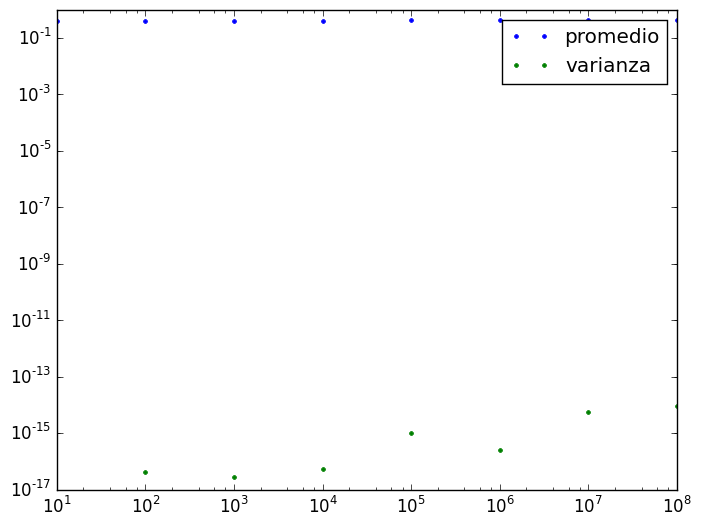

PyObject <matplotlib.legend.Legend object at 0x354e367d0>

In [134]:
loglog(X, Pr, ".", label="promedio")
loglog(X, Vr, ".", label="varianza")
legend()




Al parecer, según crece el orden de magnitud de la muestra, el cálculo de la varianza hecho por 'varianza_b' se aleja del obtenido por la funcinón interna. Pero si comparamos el tiempo con `varianza_a`:

___

In [149]:
println(@time varianza_a(Grande), " <--- (A) vs. (B) --->", @time varianza_b(Grande)[1])

  0.000012 seconds (6 allocations: 208 bytes)
  0.000351 seconds (355 allocations: 15.922 KB)
(0.08143265510266719," <--- (A) vs. (B) --->",0.0814326551026672)


In [150]:
println(@time varianza_a(MuyGrande), " <--- (A) vs. (B) --->", @time varianza_b(MuyGrande)[1])

  0.000089 seconds (6 allocations: 208 bytes)
  0.000426 seconds (355 allocations: 15.922 KB)
(0.08431473154790424," <--- (A) vs. (B) --->",0.08431473154790362)


In [151]:
println(@time varianza_a(SuperGrande), " <--- (A) vs. (B) --->", @time varianza_b(SuperGrande)[1])

  0.000879 seconds (6 allocations: 208 bytes)
  0.001414 seconds (359 allocations: 16.359 KB)
(0.08334936690939203," <--- (A) vs. (B) --->",0.08334936690939201)


In [152]:
println(@time varianza_a(Inmenso), " <--- (A) vs. (B) --->", @time varianza_b(Inmenso)[1])

  0.008779 seconds (6 allocations: 208 bytes)
  0.011183 seconds (349 allocations: 15.703 KB)
(0.08337560408814239," <--- (A) vs. (B) --->",0.08337560408814668)


___
Vaya... el calculo de la funcion `varianza_b` es considerablemente más lento...
En un principio consideré estar haciendo algo mal... pero los valores entre ambos son bastante congruentes.
Nos quedamos _definitivamente_ con la función __varianza_a__. Quizá tuvimos que hacer dos pasos, pero funcionó.


Yo usé la __Regla de Simpson Compuesta__ y la tomé de [aquí](https://es.wikipedia.org/wiki/Regla_de_Simpson#Regla_de_Simpson_compuesta "si... Wikipedia").
Propuse una función muy fácil, la constante:
$$f(x) = 3$$
Y la integré en el intervalo $[0,1]$.

Sabemos cuánto da esto:
$$\int_0^1 f(x) dx = \int_0^1 3 dx = 3  $$
Implementamos:

In [165]:
function f(x)
    y = 3
    return y
end

f (generic function with 1 method)

In [169]:
"""
Regla de simpson Compuesta. 
Recibe los limites de integracion y la cantidad de pasos deseados.
"""
function simpson_de_f{T<:Real}(a::T,b::T,n::Int64)
    (n%2)!= 0 && error("Recibido n = ",n, ". Introduce un n par, porfavor") #solo funciona para n par.
    h = (b - a)/n
    x = collect(a:h:b)
    
    index = convert(Int64, n/2)
    #println("index: ", index)
    s_par = 0.0
    s_impar = 0.0
    
    for i in 1:index-1
        s_par += f(x[2*i])
        s_impar += f(x[(2*i)-1])
    end
    s_impar += f(x[n-1])
    simpson = (h/3)*(f(a) + 2*s_par + 4*s_impar + f(b))
        
    
    #println("Funciona.") 
        
    
    
    return simpson
    
    
    
end

simpson_de_f (generic function with 1 method)

Llegada la onda de la verdad...

In [167]:
pasos = 1000
Integral = simpson_de_f(0.0,1.0,10000)

3.0

¡Vaya!... sí da lo que queremos... algo un poco más complicado.

$$\int_0^1 2x dx = x^2 | _0 ^1 = 1$$

In [168]:
function f(x)
    y = 2*x
    return y
end

f (generic function with 1 method)

In [170]:
simpson_de_f(0.0,1.0, pasos)

0.9980013333333334

Rayos... no nos aproximamos tan bien como nos hubiera gustado... ¿Mas pasos?


In [175]:
simpson_de_f(0.0,1.0, 10000000)

0.9999998000000144

Casi... pero igual no.